In [1]:
import numpy as np
import pandas as pd

stroke_norm_df = pd.read_csv('stroke_norm_df.csv',index_col=0)
stroke_norm_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,0.736842,0,1,1,1,0.801173,0.313507,1,0,1,0,0,1,0,0
1,51676,0,0.631579,0,0,1,0,0.678875,0.271375,1,0,0,1,0,0,1,0
2,31112,1,0.964912,0,1,1,0,0.234159,0.262701,1,0,1,0,0,0,1,0
3,60182,0,0.421053,0,0,1,1,0.535793,0.286245,1,0,1,0,0,0,0,1
4,1665,0,0.947368,1,0,1,0,0.549141,0.157373,1,0,0,1,0,0,1,0


In [37]:
from imblearn.combine import SMOTEENN 
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

X = stroke_norm_df.drop(['stroke','id'], axis=1)
y = stroke_norm_df['stroke']

#Oversampling
resample = SMOTEENN()

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42, stratify=y)

# #Standardize
# sc = StandardScaler()
# X_train_scaler = sc.fit_transform(X_train)
# X_test_scaler = sc.fit_transform(X_test)

# classifier = SVC(kernel='rbf')
# classifier.fit(X_train_scaler,y_train)
# y_pred = classifier.predict(X_test_scaler)

# steps = [('r', resample),('m', classifier)]
# pipeline = Pipeline(steps=steps)

# # define evaluation procedure
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# #Evaluate model
# scoring=['accuracy','precision_macro','recall_macro']
# scores = cross_validate(pipeline, X_train_scaler, y_train, scoring=scoring, cv=cv, n_jobs=-1)

# # summarize performance
# print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
# print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
# print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))

# #Classification Report
# print(classification_report(y_test, y_pred))

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pprint

estimator = LogisticRegression()
selector = RFE(estimator,n_features_to_select=6,step=1)
selector = selector.fit(X,y)
print(X)
print(selector.support_)
print(selector.ranking_)

      gender       age  hypertension  heart_disease  ever_married  \
0          1  0.736842             0              1             1   
1          0  0.631579             0              0             1   
2          1  0.964912             0              1             1   
3          0  0.421053             0              0             1   
4          0  0.947368             1              0             1   
...      ...       ...           ...            ...           ...   
5102       0  0.561404             0              0             1   
5106       0  0.982456             0              0             1   
5107       0  0.175439             0              0             1   
5108       1  0.456140             0              0             1   
5109       0  0.333333             0              0             1   

      Residence_type  avg_glucose_level       bmi  work_type_Govt_job  \
0                  1           0.801173  0.313507                   0   
1                  0     

In [17]:
from imblearn.over_sampling import SVMSMOTE
from imblearn.combine import SMOTEENN 
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

X = stroke_norm_df.drop(['stroke','id'], axis=1)
#X = stroke_norm_df[['age','hypertension','heart_disease','avg_glucose_level','work_type_Self-employed','smoking_status_never smoked']]
y = stroke_norm_df['stroke']

#Oversampling
resample = SMOTEENN()

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42, stratify=y)

svmsmote = SVMSMOTE(random_state = 101,k_neighbors=5,n_jobs=-1)
#svmsmote = SVMSMOTE(random_state = 101)

X_oversample_svm, y_oversample_svm = svmsmote.fit_resample(X_train, y_train)
#classifier_svm = LogisticRegression()
classifier_svm = SVC(kernel='linear',class_weight='balanced')
classifier_svm.fit(X_oversample_svm, y_oversample_svm)
print(classification_report(y_test, classifier_svm.predict(X_test)))

print(confusion_matrix(y_test,classifier_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      1397
           1       0.18      0.79      0.29        99

    accuracy                           0.74      1496
   macro avg       0.58      0.76      0.56      1496
weighted avg       0.93      0.74      0.80      1496

[[1030  367]
 [  21   78]]


(<Figure size 432x288 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.9291776412057361, 0.7712302346984639),
  ('0', '1'): (0.0,
   0.7745524938346765,
   0.9291776412057361,
   0.22544750616532339),
  ('1', '0'): (0.9341527655838456,
   0.0,
   0.06584723441615452,
   0.28188865398167723),
  ('1', '1'): (0.9341527655838456,
   0.2852109131178899,
   0.06584723441615452,
   0.7147890868821101)})

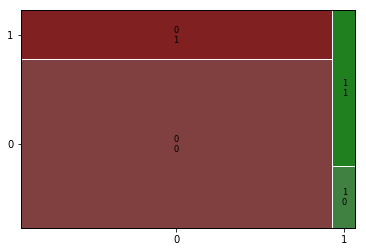

In [4]:
conf_matrix = confusion_matrix(y_test, classifier_svm.predict(X_test))
from statsmodels.graphics.mosaicplot import mosaic
mosaic(conf_matrix)

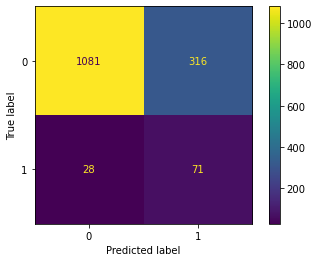

In [5]:
plot_confusion_matrix(classifier_svm, X_test, y_test)